In [1]:
from p16 import ops

In [2]:
from aocd.models import Puzzle

puzzle = Puzzle(year=2018, day=19)

def parses(data):
    ip_reg, *program = data.strip().split('\n')
    ip_reg = int(ip_reg[-1])
    program = [line.split(' ') for line in program]
    program = [(op, [int(i) for i in args]) for op, *args in program]
    return ip_reg, program
    
data = parses(puzzle.input_data)

In [3]:
sample = parses("""#ip 0
seti 5 0 1
seti 6 0 2
addi 0 1 0
addr 1 2 3
setr 1 0 0
seti 8 0 4
seti 9 0 5""")

In [4]:
sample

(0,
 [('seti', [5, 0, 1]),
  ('seti', [6, 0, 2]),
  ('addi', [0, 1, 0]),
  ('addr', [1, 2, 3]),
  ('setr', [1, 0, 0]),
  ('seti', [8, 0, 4]),
  ('seti', [9, 0, 5])])

(3,
 [('addi', [3, 16, 3]),
  ('seti', [1, 2, 5]),
  ('seti', [1, 3, 2]),
  ('mulr', [5, 2, 1]),
  ('eqrr', [1, 4, 1]),
  ('addr', [1, 3, 3]),
  ('addi', [3, 1, 3]),
  ('addr', [5, 0, 0]),
  ('addi', [2, 1, 2]),
  ('gtrr', [2, 4, 1]),
  ('addr', [3, 1, 3]),
  ('seti', [2, 5, 3]),
  ('addi', [5, 1, 5]),
  ('gtrr', [5, 4, 1]),
  ('addr', [1, 3, 3]),
  ('seti', [1, 2, 3]),
  ('mulr', [3, 3, 3]),
  ('addi', [4, 2, 4]),
  ('mulr', [4, 4, 4]),
  ('mulr', [3, 4, 4]),
  ('muli', [4, 11, 4]),
  ('addi', [1, 6, 1]),
  ('mulr', [1, 3, 1]),
  ('addi', [1, 21, 1]),
  ('addr', [4, 1, 4]),
  ('addr', [3, 0, 3]),
  ('seti', [0, 3, 3]),
  ('setr', [3, 4, 1]),
  ('mulr', [1, 3, 1]),
  ('addr', [3, 1, 1]),
  ('mulr', [3, 1, 1]),
  ('muli', [1, 14, 1]),
  ('mulr', [1, 3, 1]),
  ('addr', [4, 1, 4]),
  ('seti', [0, 3, 0]),
  ('seti', [0, 7, 3])])

In [135]:
def solve_a(data):
    ip_reg, program = data
    ip = 0
    N = len(program)
    reg = [0]*6
    while ip < N:
        opcode, args = program[ip]
        reg[ip_reg] = ip
        ops[opcode](reg, *args)
        ip = reg[ip_reg] + 1
    return reg[0]

In [136]:
solve_a(sample)

6

In [139]:
def solve_b(data, reg0=1):
    """
    Tricky problem, it can be solved rather analitically
    I'm unsure how the input changes but the rough idea is as follows:

    After disassembling the code it can be simplified down to
    r4 = 989 if r0 == 0 else 10551389
    for r5 in range(r4):
        for r2 in range(r4):
            if i*j == r4:
                r0 += r5

    which for large numbers is still unwieldy to simulate.
    However we can easily solve it by realizing that we are just
    computing the sum of factors/divisors of r4
    """

    ip_reg, program = data
    ip = 0
    reg = [reg0] + [0]*5
    while ip != 3:
        opcode, args = program[ip]
        reg[ip_reg] = ip
        ops[opcode](reg, *args)
        ip = reg[ip_reg] + 1
    loop_reg = program[13][1][1] # Loop register
    N = reg[loop_reg]
    return sum(divisors(N))


In [140]:
solve_b(data, 0)

1056

In [141]:
solve_b(data, 1)

10915260

In [ ]:
addi 3 16 3
seti 1 2 5
seti 1 3 2
mulr 5 2 1
eqrr 1 4 1
addr 1 3 3
addi 3 1 3
addr 5 0 0
addi 2 1 2
gtrr 2 4 1
addr 3 1 3
seti 2 5 3
addi 5 1 5
gtrr 5 4 1
addr 1 3 3
seti 1 2 3
mulr 3 3 3
addi 4 2 4
mulr 4 4 4
mulr 3 4 4
muli 4 11 4
addi 1 6 1
mulr 1 3 1
addi 1 21 1
addr 4 1 4
addr 3 0 3
seti 0 3 3
setr 3 4 1
mulr 1 3 1
addr 3 1 1
mulr 3 1 1
muli 1 14 1
mulr 1 3 1
addr 4 1 4
seti 0 3 0
seti 0 7 3


In [87]:
solve_a(data)

[1,
 1,
 989,
 978121,
 978121,
 978121,
 978117,
 4,
 978121,
 978121,
 978121,
 977132,
 989,
 989,
 989,
 988,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [123]:
def solve_b(data, i=0):
    ip_reg, program = data
    ip = 0
    N = len(program)
    reg = [i] + [0]*5
    regs = []
#     while ip < N:
    c = [0 for _ in program]
    j = 0
    for i in range(7828936):
        opcode, args = program[ip]
        c[ip] += 1
#         print(ip, opcode, args)
#         print(f'ip={ip} {reg} {opcode} {args}', end=' ')
        reg[ip_reg] = ip
        ops[opcode](reg, *args)
        ip = reg[ip_reg] + 1
        if ip == 3:
            j += 1
            if j % 1_000:
                regs.append(reg[::])
    print(reg)
    print(c)
    return regs

In [124]:
regsA = np.array(solve_b(data, 0)).T
regsB = np.array(solve_b(data, 1)).T

[1, 1, 989, 978121, 978121, 978121, 978117, 4, 978121, 978121, 978121, 977132, 989, 989, 989, 988, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 1, 1, 978615, 978615, 978615, 978614, 0, 978614, 978614, 978614, 978614, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]


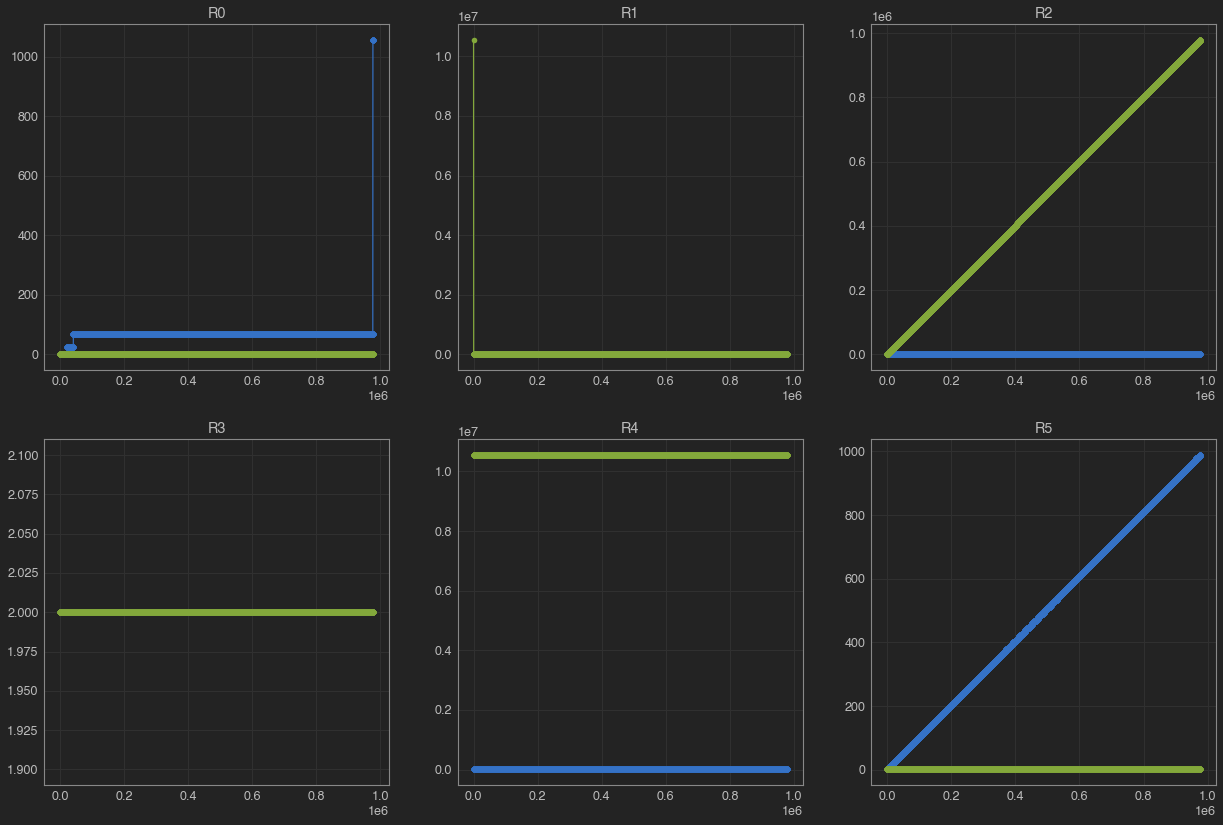

In [125]:
fig, ax = plt.subplots(2,3,figsize=(21,14))

for i, reg in enumerate(regs):
    ax[divmod(i,3)].plot(regsA[i], 'o-')
    ax[divmod(i,3)].plot(regsB[i], 'o-')
    ax[divmod(i,3)].set(title=f'R{i}')

In [133]:
from sympy import factorint, divisors

In [134]:
divisors(10551389)

[1, 29, 363841, 10551389]

In [128]:
factorint(989)

{23: 1, 43: 1}

In [129]:
989+23+43

1055

In [130]:
factorint(ttps://www.wolframalpha.com/input/?i=sum+of+factors+{)

{29: 1, 363841: 1}

In [131]:
10551389+363841+29+1

10915260

In [ ]:
def test(N):
    for r5 in range(N):
        if 989 % r5 == 0:
    

In [71]:
regs

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   6, 132, 153, 153, 153, 153, 153, 153,
          1,   0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0,   0,   3,   0,   0,   0,   0,   0,   0,   0,   4,   0,
          0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0,   0,   0,
          0,   6,   0,   0,   0,   0,   0,   0,   0,   7,   0,   0,   0,
          0,   0,   0,   0,   8,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
3 mulr [5, 2, 1]
4 eqrr [1, 4, 1]
5 addr [1, 3, 3]
6 addi [3, 1, 3]
8 addi [2, 1, 2]
9 gtrr [2, 4, 1]
10 addr [3, 1, 3]
11 seti [2, 5, 3]